# Final Project - Fake and Real News Classification

#### Darren Bonifacio
#### Dr. Bixler
#### Data Science
#### 26 January 2023

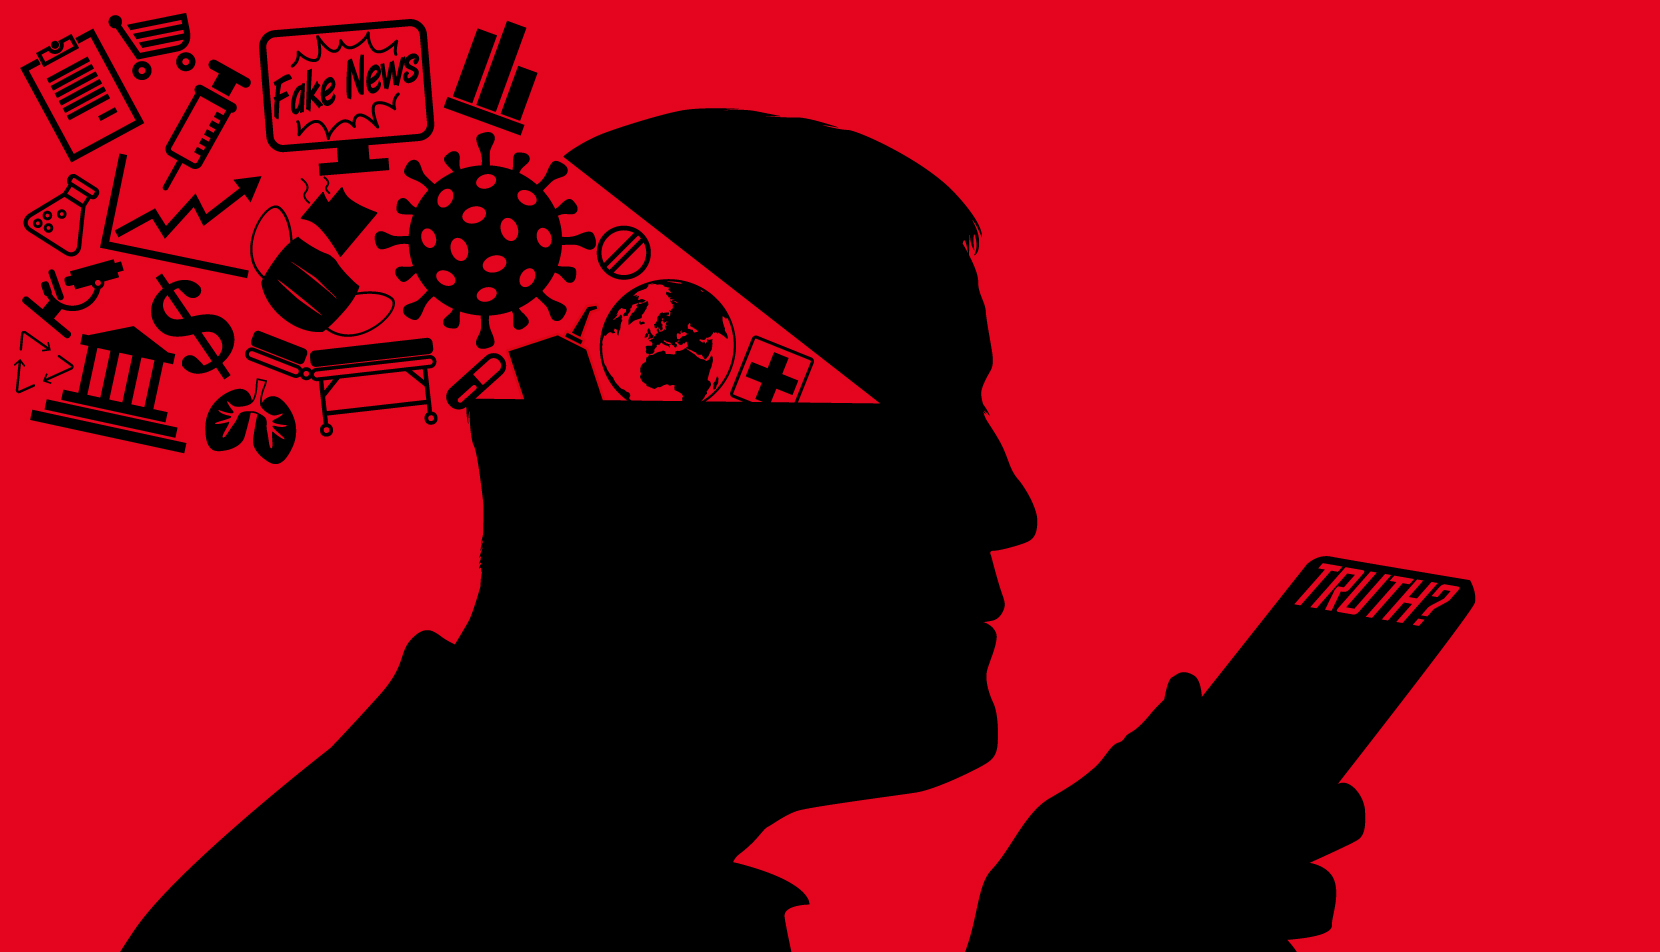

**Fake news** is defined by the [Cambridge Dictionary](https://dictionary.cambridge.org/us/dictionary/english/fake-news) as "false stories that appear to be news, spread on the internet or using other media, usually created to influence political views or as a joke." On the other hand, **real news** is the opposite, instead covering true stories. 

While fake news has been around throughout history, there has been an even more widespread impact of fake news in the modern day as a result of the Internet increasing its the amount that is published as well as access to it. In addition to the financial incentives that news providers have to post false, often propagandous, news articles, political polarization has also been driving the spread of fake news in the United States.

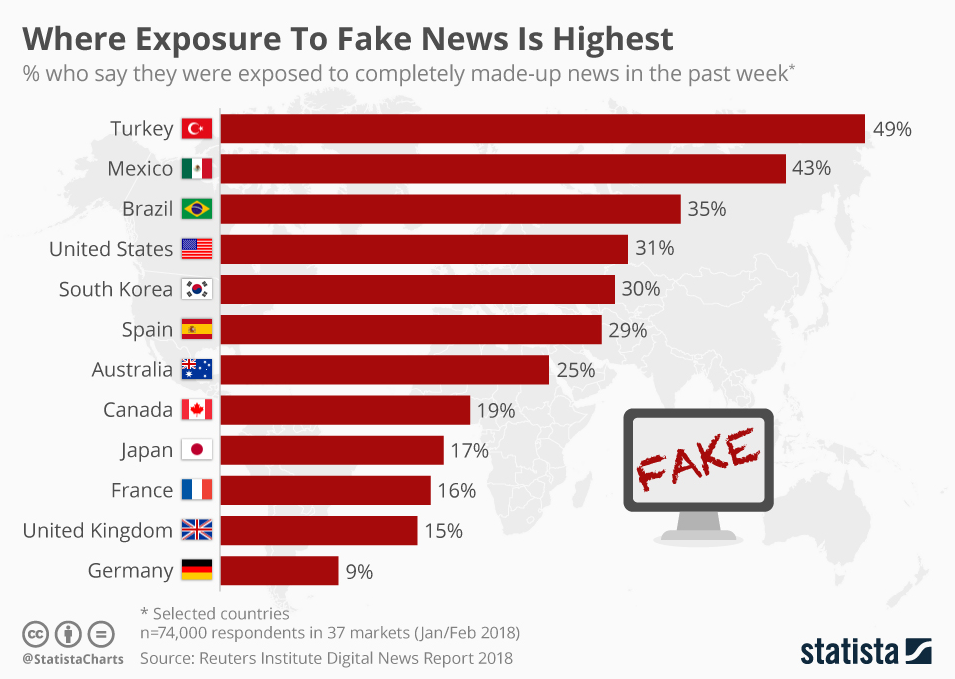

The dataset contains the cleaned and processed data (title, text, subject, and date published) of fake and real online news articles. Most of the articles were published between 2016 and 2017. The truthful articles (21,417 in total) were obtained by crawling articles from *Reuters.com* and published from 2016 to 2018. The fake news articles (23,481 in total) were collected from unreliable websites that were flagged by *Politifact* (a fact-checking organization in the USA) and *Wikipedia*. They were published from 2015 to 2018. The majority of articles focus on political and World news topics, though some focus on other subjects. 

This interests me because I am curious to find the patterns that fake articles have compared to real articles, such as their spelling or grammatical errors. Also, I consider the subject of fake vs. real information to be important, especially in the modern day—where communication and information are absolutely vital to society.


[This dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset) was taken from Kaggle. More info on the data set can be found [here](https://www.uvic.ca/engineering/ece/isot/assets/docs/ISOT_Fake_News_Dataset_ReadMe.pdf).

There is hardly any need for any ethical considerations in this project, as these article titles, text, subject, and date posted are all public information disconnected from individuals' confidential personal information. Furthermore, these data are all provided by the news sources themselves, so their understanding of what could be done with the data is assumed. As such, the data fulfills the "five C's for building data products": Consent, Clarity, Consistency and Trust, Control and Transparency, and Consequences. However, one thing to mention is that the project *may* have the consequence of harming the profits of fake news providers if it shows positive results and goes public.

# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Exploratory Data Analysis

#### Column definition
- title: The title of the article
- text: The text within the article
- subject: The subject or topic of article 
- date: The date that the article was published

#### Reading in and combining the DataFrames

In [2]:
# Reads in the DataFrame containing the fake articles and adds a 'Fake' column set as True
df_fake = pd.read_csv('data\Fake.csv')
df_fake['Fake'] = True
df_fake.head()

,title,text,subject,date,Fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",True
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",True
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",True
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",True
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",True


In [3]:
# Reads in the DataFrame containing the real articles and adds a 'Fake' column set as False
df_real = pd.read_csv('data\True.csv')
df_real['Fake'] = False
df_real.head()

,title,text,subject,date,Fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",False
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",False
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",False
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",False
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",False


In [4]:
df = pd.concat([df_fake , df_real])

With this, there is now a single DataFrame with a 'Fake' column signifying the validity of an article; True means the article is fake and False means the article is real.

In [5]:
# Randomly shuffles the rows of the DataFrame 'df' using the .sample() function and then resets the index of the DataFrame 
# using the .reset_index() function.
df = df.sample(len(df))
df.reset_index()

,index,title,text,subject,date,Fake
0,10632,FULL TRANSCRIPT AND VIDEO From A Passionate AG...,FULL OPENING STATEMENT OF ATTORNEY GENERAL SES...,politics,"Jun 13, 2017",True
1,6297,Woman Who Worked For Trump Warns “He HAS To B...,Barbara Res worked for seven years as the head...,News,"May 18, 2016",True
2,7406,California voters turn down drug pricing initi...,LOS ANGELES (Reuters) - California voters turn...,politicsNews,"November 9, 2016",False
3,5905,This Gay Man’s Love-Filled Response To The Or...,"On Sunday morning, Americans awoke to the news...",News,"June 12, 2016",True
4,11027,WHY DID PRESIDENT TRUMP Receive 100 Day Scruti...,What factors determine what makes the first 10...,politics,"Apr 28, 2017",True
...,...,...,...,...,...,...
44893,2907,"Illinois House to take up governor's budget, t...",CHICAGO (Reuters) - The fate of a spending pla...,politicsNews,"July 4, 2017",False
44894,18264,Nerve agent VX found on shirts of women accuse...,KUALA LUMPUR (Reuters) - Traces of a deadly ne...,worldnews,"October 5, 2017",False
44895,20154,Angola's opposition loses appeal to annul elec...,LUANDA (Reuters) - Angola s Constitutional Cou...,worldnews,"September 13, 2017",False
44896,22457,US Presidential Debates Much More Corrupt Than...,"Brasscheck TVNearly 30 years ago, two criminal...",US_News,"October 4, 2016",True


Preprocessing: By randomizing the order of the data and reordering the index before training a model, it ensures that the model is not influenced by any inherent order in the data.

#### Data Distribution and Data Quality Review

In [6]:
# Returns description of the data in the DataFrame
df.describe()

,title,text,subject,date,Fake
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",True
freq,14,627,11272,182,23481


In [7]:
# Prints info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 10632 to 20268
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Fake     44898 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 1.8+ MB


In [8]:
# Identifies columns that have missing data
df.isna().any()

title      False
text       False
subject    False
date       False
Fake       False
dtype: bool

There are no missing values in any column

In [9]:
# Calculates the number of duplicate values in the DataFrame
df.duplicated().sum()

209

In [10]:
df[df.duplicated()]

,title,text,subject,date,Fake
13434,Ireland demands 'significantly more clarity' f...,DUBLIN/BRUSSELS (Reuters) - Ireland needs Brit...,worldnews,"November 30, 2017",False
10951,Obama claims victory after drop in U.S. jobles...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"February 5, 2016",False
12744,Vietnam police arrest ex-politburo member over...,HANOI (Reuters) - Vietnamese police on Friday ...,worldnews,"December 8, 2017",False
14472,Freeport evacuating Indonesian mine worker fam...,"TIMIKA, Indonesia (Reuters) - U.S. miner Freep...",worldnews,"November 17, 2017",False
7412,Republicans defend grip on U.S. Congress as Tr...,WASHINGTON (Reuters) - Republicans maintained ...,politicsNews,"November 8, 2016",False
...,...,...,...,...,...
11668,South Africa's new ANC leader Ramaphosa aims t...,"JOHANNESBURG (Reuters) - Cyril Ramaphosa, the ...",worldnews,"December 20, 2017",False
13336,U.N. aid chief appeals for full lifting of Yem...,GENEVA (Reuters) - The United Nations appealed...,worldnews,"December 1, 2017",False
17468,Trump strikes blow at Iran nuclear deal in maj...,WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"October 13, 2017",False
11289,"U.S. sanctions North Korean missile experts, R...",WASHINGTON/MOSCOW (Reuters) - The United State...,worldnews,"December 26, 2017",False


In [11]:
# Drops the duplicate values, like the ones shown above
df = df.drop_duplicates()

By dropping the duplicates, it avoids biasing the model during training and producing inaccurate results during evaluation

In [12]:
# Shows the number of fake and real articles
df.groupby('Fake').count()

,title,text,subject,date
Fake,,,,
False,21211,21211,21211,21211
True,23478,23478,23478,23478


There are more fake articles (labeled 'True' as in it is true that it is fake) than true. However, the difference is negligible and likely will not cause any biases.

## 1. Which periods of time had the largest concentration of fake news?

In [13]:
# Converts the dates to datetime and drops any rows containing any invalid dates
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)
df

,title,text,subject,date,Fake
10632,FULL TRANSCRIPT AND VIDEO From A Passionate AG...,FULL OPENING STATEMENT OF ATTORNEY GENERAL SES...,politics,2017-06-13,True
6297,Woman Who Worked For Trump Warns “He HAS To B...,Barbara Res worked for seven years as the head...,News,2016-05-18,True
7406,California voters turn down drug pricing initi...,LOS ANGELES (Reuters) - California voters turn...,politicsNews,2016-11-09,False
5905,This Gay Man’s Love-Filled Response To The Or...,"On Sunday morning, Americans awoke to the news...",News,2016-06-12,True
11027,WHY DID PRESIDENT TRUMP Receive 100 Day Scruti...,What factors determine what makes the first 10...,politics,2017-04-28,True
...,...,...,...,...,...
2907,"Illinois House to take up governor's budget, t...",CHICAGO (Reuters) - The fate of a spending pla...,politicsNews,2017-07-04,False
18264,Nerve agent VX found on shirts of women accuse...,KUALA LUMPUR (Reuters) - Traces of a deadly ne...,worldnews,2017-10-05,False
20154,Angola's opposition loses appeal to annul elec...,LUANDA (Reuters) - Angola s Constitutional Cou...,worldnews,2017-09-13,False
22457,US Presidential Debates Much More Corrupt Than...,"Brasscheck TVNearly 30 years ago, two criminal...",US_News,2016-10-04,True


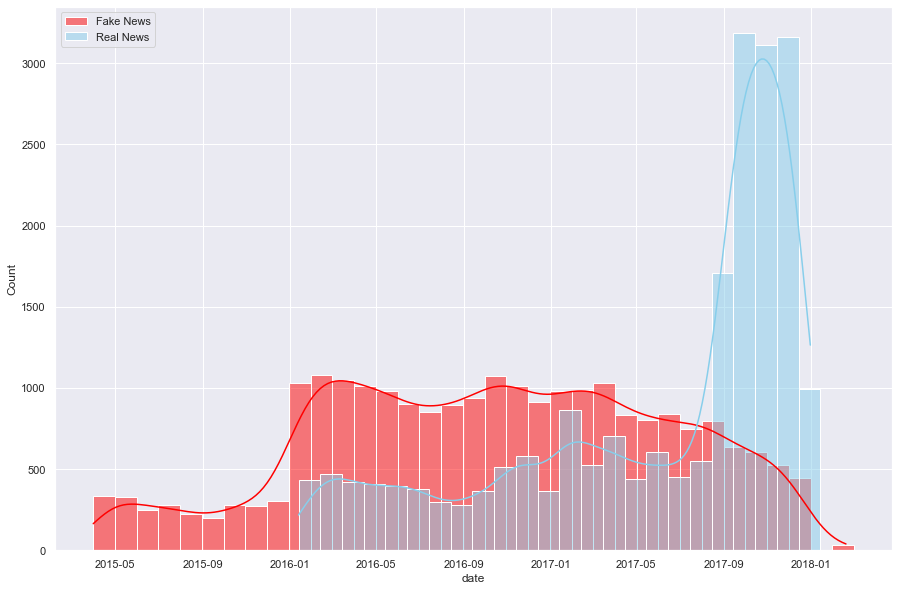

In [29]:
# Prints the histogram below, comparing the frequencies of the times when real and fake articles were published
sns.histplot(data=df[df['Fake']==True], x="date", color="red", label="Fake News", kde=True, binwidth=30.5)
sns.histplot(data=df[df['Fake']==False], x="date", color="skyblue", label="Real News", kde=True, binwidth=30.5)

sns.set(rc={'figure.figsize':(15,10)})
plt.legend() 
plt.show()

There is a spike in fake news articles starting 2016, but this likely has to do with the fact that most articles were pulled from 2016-2017. Evidently, there is a spike in real news in late 2017 to early 2018. This may have to do with idiosyncrasies in the dataset, but may also present some connection to the real world, such as news regarding the new presidency of Donald Trump.

## 2. Is the length of the headline correlated with whether the news is real or fake?

In [15]:
# This generates a new column containing the article title length
df['title_length'] = df['title'].apply(lambda x: len(x))
df

,title,text,subject,date,Fake,title_length
10632,FULL TRANSCRIPT AND VIDEO From A Passionate AG...,FULL OPENING STATEMENT OF ATTORNEY GENERAL SES...,politics,2017-06-13,True,86
6297,Woman Who Worked For Trump Warns “He HAS To B...,Barbara Res worked for seven years as the head...,News,2016-05-18,True,64
7406,California voters turn down drug pricing initi...,LOS ANGELES (Reuters) - California voters turn...,politicsNews,2016-11-09,False,51
5905,This Gay Man’s Love-Filled Response To The Or...,"On Sunday morning, Americans awoke to the news...",News,2016-06-12,True,75
11027,WHY DID PRESIDENT TRUMP Receive 100 Day Scruti...,What factors determine what makes the first 10...,politics,2017-04-28,True,90
...,...,...,...,...,...,...
2907,"Illinois House to take up governor's budget, t...",CHICAGO (Reuters) - The fate of a spending pla...,politicsNews,2017-07-04,False,55
18264,Nerve agent VX found on shirts of women accuse...,KUALA LUMPUR (Reuters) - Traces of a deadly ne...,worldnews,2017-10-05,False,83
20154,Angola's opposition loses appeal to annul elec...,LUANDA (Reuters) - Angola s Constitutional Cou...,worldnews,2017-09-13,False,57
22457,US Presidential Debates Much More Corrupt Than...,"Brasscheck TVNearly 30 years ago, two criminal...",US_News,2016-10-04,True,62


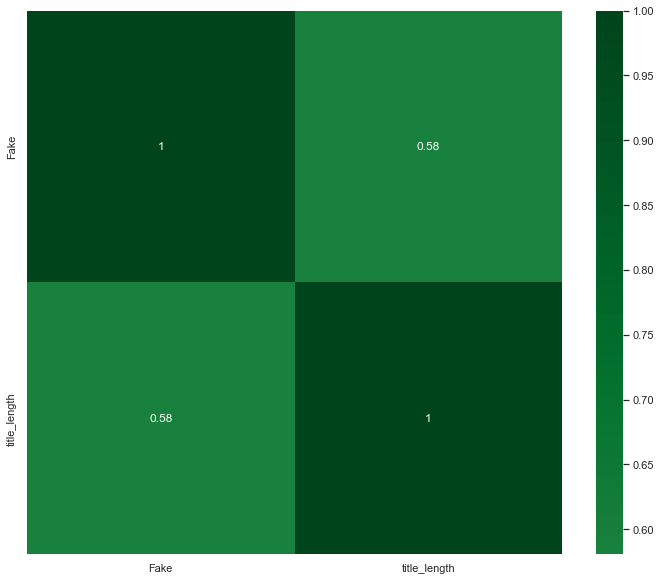

In [16]:
# Creates the correlation matrix below, between the validity of the article and the title length
from matplotlib import cm
df_map = pd.DataFrame(df)
plt.figure(figsize=(12,10))
corrMatrix = df_map.corr()
sns.heatmap(corrMatrix, annot=True, cmap=cm.Greens, center=0)
plt.show()

This correlation matrix shows moderate positive correlation. Thus, he longer the headline generally the more likely to be false. This may have to do with the concept of "clickbait" where a stimulating, provocative title draws more attention. Long headlines appear likely to do this.

# Preparing the DataFrame for Machine Learning

In [17]:
df_ = df.groupby(by = ['Fake' , 'subject' ] , sort = True).count()
df_

title   text   date  title_length
Fake  subject                                           
False politicsNews     11220  11220  11220         11220
      worldnews         9991   9991   9991          9991
True  Government News   1568   1568   1568          1568
      Middle-east        778    778    778           778
      News              9050   9050   9050          9050
      US_News            783    783    783           783
      left-news         4456   4456   4456          4456
      politics          6833   6833   6833          6833

In [18]:
df_ = df.groupby('Fake').count()
df_

,title,text,subject,date,title_length
Fake,,,,,
False,21211,21211,21211,21211,21211
True,23468,23468,23468,23468,23468


In [19]:
df_news = df.loc[:, ['title' , 'text', 'Fake']]
df_news

,title,text,Fake
10632,FULL TRANSCRIPT AND VIDEO From A Passionate AG...,FULL OPENING STATEMENT OF ATTORNEY GENERAL SES...,True
6297,Woman Who Worked For Trump Warns “He HAS To B...,Barbara Res worked for seven years as the head...,True
7406,California voters turn down drug pricing initi...,LOS ANGELES (Reuters) - California voters turn...,False
5905,This Gay Man’s Love-Filled Response To The Or...,"On Sunday morning, Americans awoke to the news...",True
11027,WHY DID PRESIDENT TRUMP Receive 100 Day Scruti...,What factors determine what makes the first 10...,True
...,...,...,...
2907,"Illinois House to take up governor's budget, t...",CHICAGO (Reuters) - The fate of a spending pla...,False
18264,Nerve agent VX found on shirts of women accuse...,KUALA LUMPUR (Reuters) - Traces of a deadly ne...,False
20154,Angola's opposition loses appeal to annul elec...,LUANDA (Reuters) - Angola s Constitutional Cou...,False
22457,US Presidential Debates Much More Corrupt Than...,"Brasscheck TVNearly 30 years ago, two criminal...",True


In [20]:
# Creates new dataframe with the title, text and validity and then connects the title and text
df_news = df.loc[:, ['title' , 'text', 'Fake']]
df_news['title_text'] = df['title'] + ' - '+ df['text']

In [21]:
df_news = df_news[['title_text' , 'Fake']]

The new DataFrame only uses the title and text of the article.

In [22]:
df_news

,title_text,Fake
10632,FULL TRANSCRIPT AND VIDEO From A Passionate AG...,True
6297,Woman Who Worked For Trump Warns “He HAS To B...,True
7406,California voters turn down drug pricing initi...,False
5905,This Gay Man’s Love-Filled Response To The Or...,True
11027,WHY DID PRESIDENT TRUMP Receive 100 Day Scruti...,True
...,...,...
2907,"Illinois House to take up governor's budget, t...",False
18264,Nerve agent VX found on shirts of women accuse...,False
20154,Angola's opposition loses appeal to annul elec...,False
22457,US Presidential Debates Much More Corrupt Than...,True


With this, the DataFrame is set for machine learning.

# Machine Learning

## Can the naive Bayes classifier accurately predict whether an article is real or fake?

The naive Bayes classifier is a probabilistic machine learning algorithm based on the Bayes Theorem (shown below). This classifier estimates the probability of each class, given the input features, based on this theorem. It is called naive because it assumes that all the features in the dataset are independent of each other. Specifically, multinomial naive Bayes (used here) is known for its simplicity and is mostly used in classification tasks and Natural Language Processing (NLP); as such, it is common in document classification.

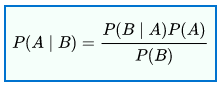

In [24]:
# Creates the feature matrix using the title_text column
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_news["title_text"])

# Creates the target vector using the Fake column
y = df_news["Fake"]

# Splits the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Creates a Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Tests the classifier on the test data
y_pred = clf.predict(X_test)

# Prints the accuracy score of the classifier
nb_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9554610564010743


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.95      0.96      0.95      4208
        True       0.96      0.95      0.96      4728

    accuracy                           0.96      8936
   macro avg       0.96      0.96      0.96      8936
weighted avg       0.96      0.96      0.96      8936



- Precision: Proportion of how many were accurately classified correctly out of the predicted positive observations

- Recall: The ratio of correctly predicted positive observations to all observations in actual class

- f1-score: The mean of the precision and recall

- Support: The number of occurrences of the given class in the dataset


- Macro-averaged: all classes equally contribute to the final averaged metric.

- Weighted-averaged: each classes's contribution to the average is weighted by its size.

From this, we can see that the precision, recall, and accuracy (macro and weighted) are all 0.96, along with the model's test accuracy. Thus, it is clear that this classifier is very effective at predicting whether a news article is fake or real, being accurate in its prediction 96% of the time. 

#### Fake Article Test (https://www.theonion.com/trump-returns-to-facebook-after-2-years-to-find-everyon-1850036175)

In [26]:
# Tests an example article that is fake
example_article_1 = "Trump Returns To Facebook After 2 Years To Find Everyone Engaged And Having Babies - PALM BEACH, FL—Wistfully remarking how things had changed since he left the social media site two years ago, former President Donald Trump reportedly returned to Facebook Thursday to find everyone engaged and having babies. “Oh wow, Kevin and Kim had a cute little kid after all those years of trying—good for them,” said Trump, scrolling with surprise through the profiles of once-single friends to discover dozens of wedding and birth pictures, all of which he liked or commented on. “Patricia thought she’d never come back from that divorce, but look at this: She’s married again! She seems really happy, too. And Arnie lost a lot of weight. Boy, I can’t believe I fell out of touch with some of these people. Oh look, one of those videos where they feed miniature snacks to a guinea pig.” Trump went on to chuckle and comment that “the more things change, the more they stay the same” after catching sight of a post from his high school friend who was still trying to get an online bead store off the ground."

# Transforms the example article into a feature matrix
example_matrix = vectorizer.transform([example_article_1])

# Predicts whether the example article is fake or real
prediction = clf.predict(example_matrix)

# Prints the prediction
print("Prediction:", prediction)

Prediction: [ True]


#### Real Article Test (https://www.politico.com/news/2023/01/26/us-sends-ukraine-advanced-abrams-tanks-00079648)

In [27]:
# Tests another example article that is real
example_article_2 = "U.S. to send Ukraine more advanced Abrams tanks — but no secret armor - The U.S. is planning to send Kyiv the Abrams main battle tank in its more advanced M1A2 configuration, rather than the older A1 version that the military has in storage, according to three people with knowledge of the deliberations. But the 31 tanks slated for Ukraine will not include the secret armor mix that makes the Army’s newest version so lethal, said the people, who spoke on condition of anonymity to discuss sensitive conversations. The A2 version has more sophisticated optics and controls than the older A1 version, which the Army intends to retire in the next few years. Outwardly similar to the A1, the A2 has a redesigned commander’s weapon station with improved optics for targeting, and an independent thermal viewer that allows the commander to independently scan for targets in all weather and battlefield conditions. The most radical changes are on the inside, which has been redesigned to take advantage of new technology. The control mechanisms are digitized, most notably a new inter-vehicle information system that allows vehicles to exchange information continuously and automatically. Using the new technology, commanders can rapidly track the location of friendly vehicles, identify enemy positions and process artillery requests. But federal policy forbids the export of Abrams with classified armor packages used by the U.S. military, which includes depleted uranium, according to a fourth person with knowledge of the policy. The U.S. strips the vehicles of this secret armor “recipe” before selling them to other countries. There are other armor packages the U.S. can provide for foreign military sales customers. The Pentagon is planning to provide Ukraine the A2 version in this “exportable” form, according to one defense official and two other people with knowledge of the deliberations. Questions remain over the timeline of when the Abrams tanks can be delivered to Ukraine. The tanks are assembled in one place only — a government-owned, General Dynamics-operated plant in Lima, Ohio. That facility can produce 12 tanks per month, but the line is now full of new tank orders for Taiwan and Poland — orders it would be difficult and likely controversial to put on the backburner. The Army is providing multiple options for senior leaders to determine the way ahead, the service’s acquisition chief, Doug Bush, told reporters Wednesday. Poland has ordered 250 A2 tanks that will be delivered starting in 2025, but in the meantime is receiving an emergency infusion of 116 M1A1 tanks recently retired by the Marine Corps. Warsaw asked for the tanks to quickly replace the 250 Soviet-era T-72 tanks it gave Ukraine last year, and the shuttering of the Marine Corps tank units made hundreds of well-maintained tanks available immediately. Taiwan ordered 108 M1A2 tanks in 2019, and the first are expected to be delivered in 2024. General Dynamics no longer builds the M1 from scratch, but has a number of “M1 seed vehicles” that are bare-bone tanks. When new orders come in, General Dynamics modifies these seed vehicles with new technology depending on which variant is selected. But these upgrades are not “easy or fast,” Bush said. Rather than sending Ukraine tanks from its own stocks, as it has done with previous weapons, the U.S. has said it is buying the Abrams from industry, meaning they won’t arrive on the battlefield for many months, or potentially years, given industrial constraints in upgrading them. In the meantime, the U.S. will train Ukrainian forces on how to maintain and operate the tanks, as well as “combined arms maneuver” tactics to help them integrate the weapons into their overall operations. Either Abrams version would be a significant upgrade from the Soviet-era tanks Ukraine now operates, in firepower, accuracy and armor. But once they arrive, Ukrainian forces will be challenged to keep them in operation, experts said. Those challenges are why the Biden administration pushed the delivery of German-made Leopard tanks, which are easier to maintain and train on. The first Leopards from Germany and other European countries will likely start arriving in Ukraine this spring. Unlike other tanks that use diesel, the Abrams has a jet turbine engine that guzzles JP-8 jet fuel, which is more expensive and harder to maintain. They are also tricky to maintain, and any crew error could trigger the engine to blow. Meanwhile, they require a massive infrastructure, including M88 recovery vehicles to repair broken parts on the battlefield, to operate. “The M1 is a complex weapon system that is challenging to maintain, as we’ve talked about,” Pentagon spokesperson Brig. Gen. Pat Ryder said Tuesday. “That was true yesterday; it’s true today; it will be true in the future.”"

# Transforms the example article into a feature matrix
example_matrix = vectorizer.transform([example_article_2])

# Predicts whether the example article is fake or real
prediction = clf.predict(example_matrix)

# Prints the prediction
print("Prediction:", prediction)

Prediction: [False]


## 4. Can the Random Forest classifier accurately predict whether an article is real or fake?

Random forests are a collection of decision trees where the end model is determined by averaging outputs of the trees (when used in regression) or by basing the model on majority vote of the results from each decision tree (when used in classification). Like in the previous section, this code calculates the accuracy of a classifier, in this case, a Random Forest Classifier. [More info](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [30]:
# Prepares the data
X = df_news["title_text"]
y = df_news["Fake"]

# Vectorizes the text data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

# Splits the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Fits the model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Predicts on the test set
y_pred = clf.predict(X_test)

# Shows the accuracy
rfc_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", rfc_acc)

Accuracy: 0.9918307967770814


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      4208
        True       0.99      0.99      0.99      4728

    accuracy                           0.99      8936
   macro avg       0.99      0.99      0.99      8936
weighted avg       0.99      0.99      0.99      8936



From this, we can see that the precision, recall, and accuracy (macro and weighted) are all 0.99, along with the model's test accuracy. Thus, it is clear that this classifier is extremely effective at predicting whether a news article is fake or real, being accurate in its prediction 99% of the time. 

#### Fake Article Test (https://www.theonion.com/trump-returns-to-facebook-after-2-years-to-find-everyon-1850036175)

In [32]:
# Tests the same fake example article
example_article_1 = tfidf.transform([example_article_1])
prediction = clf.predict(example_article_1)
print("Prediction:",prediction)

Prediction: [ True]


#### Real Article Test (https://www.politico.com/news/2023/01/26/us-sends-ukraine-advanced-abrams-tanks-00079648)

In [33]:
# Tests the same real example article
example_article_2 = tfidf.transform([example_article_2])
prediction = clf.predict(example_article_2)
print("Prediction:",prediction)

Prediction: [False]


## 5. Which model is better, the naive Bayes classifier or the Random Forest classifier?

In [34]:
print(nb_acc)

0.9554610564010743


In [35]:
print(rfc_acc)

0.9918307967770814


The random forest classifier performs with a higher accuracy.

# Analysis

The Random Forest classifier performed better overall compared to the naive Bayes classifier. This type of classification algorithm is [known](https://www.ibm.com/topics/random-forest) for its accurate predictions but also its slowness at processing data, as it computes data for each individual decision tree. Thus, the complexity of the Random Forest classifier's processes likely caused it to outperform the naive Bayes classifier, which is known for its relative simplicity for relying on a consistent mathematical theorem (the Bayes Theorem).